In [0]:
from sklearn import metrics
from sklearn import datasets
import pylab as pl #chart lib
import pandas as pd
import numpy as np

In [0]:
#Lets use Iris Dataset (So Famous!)
iris = datasets.load_iris()

In [0]:
#converting to dataframe format
df_iris = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns=iris['feature_names'] + ['target'])

In [4]:
#checking dataset
print(df_iris.head(10))

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0
5                5.4               3.9  ...               0.4     0.0
6                4.6               3.4  ...               0.3     0.0
7                5.0               3.4  ...               0.2     0.0
8                4.4               2.9  ...               0.2     0.0
9                4.9               3.1  ...               0.1     0.0

[10 rows x 5 columns]


In [0]:
#transform data into array format
x = df_iris.iloc[:, :-1].values #input data
y = df_iris.iloc[:, 4].values #output data

In [0]:
#split train - test dataset
from sklearn.model_selection import train_test_split 
#splitting and setting 20% data as a test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20) 

In [0]:
#applying data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
#setting up Network config

#network with 2 layers and 5 neurons

clf = MLPClassifier(solver='lbfgs', alpha=0.0005,
                    hidden_layer_sizes=(5,5), random_state=1)

In [12]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
#making prediction

y_pred = clf.predict(X_test)

In [14]:
#assessing the model

#building confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0  9  0]
 [ 0  3 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.75      1.00      0.86         9
         2.0       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.91        30
weighted avg       0.93      0.90      0.90        30



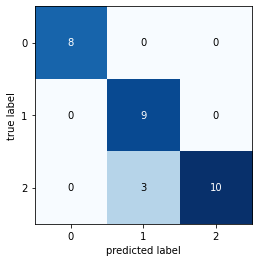

In [15]:
# analysing the model
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('NNConfusionMatrix.png')
pl.show()